In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 37.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pylab
from matplotlib import pyplot
%matplotlib inline

In [ ]:
data=yf.download('AMZN',start='2020-06-01', interval='1h',  end='2021-06-01',progress=False)[['Close']]
data.head()

,Close
2020-06-01 09:30:00-04:00,2472.007568
2020-06-01 10:30:00-04:00,2461.639893
2020-06-01 11:30:00-04:00,2468.232910
2020-06-01 12:30:00-04:00,2470.982422
2020-06-01 13:30:00-04:00,2467.334961


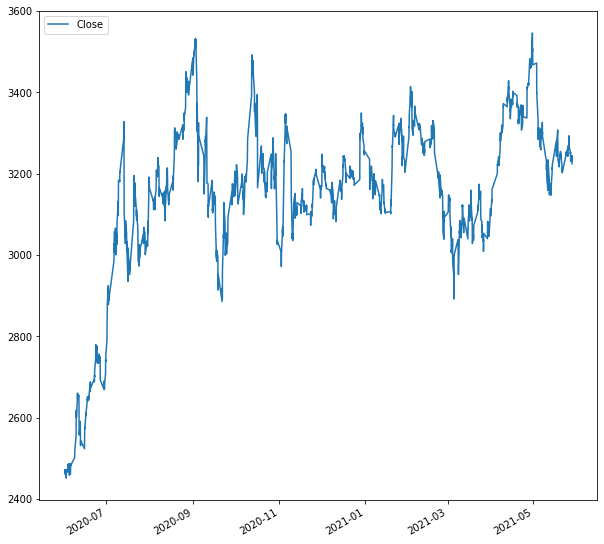

In [ ]:
data.plot(figsize=(10,10))

In [ ]:
cl = data.Close.astype('float32')
train = cl[0:int(len(cl)*0.80)]
scl = MinMaxScaler()
#Scale the data
scl.fit(train.values.reshape(-1,1))
cl =scl.transform(cl.values.reshape(-1,1))
#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
 
 
lb=10
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]

print(y_train)

[0.01250958 0.01521754 0.01252556 ... 0.8474834  0.84385705 0.84552693]


In [ ]:
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
print(y_train)

[0.01250958 0.01521754 0.01252556 ... 0.8474834  0.84385705 0.84552693]


In [ ]:
model1=Sequential()
dense1_1=Dense(units=32, input_dim=10, activation='relu')
model1.add(dense1_1)
dense1_2=Dense(8, activation='relu')
model1.add(dense1_2)
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])

In [ ]:
model2=Sequential()
dense2_1=Dense(units=32, input_dim=10, activation='relu')
model2.add(dense2_1)
dense2_2=Dense(8, activation='relu')
model2.add(dense2_2)
model2.add(Dense(1))
model2.layers[0].set_weights([model1.layers[0].get_weights()[0], model1.layers[0].get_weights()[1]])
model2.layers[1].set_weights([model1.layers[1].get_weights()[0], model1.layers[1].get_weights()[1]])
model2.layers[2].set_weights([model1.layers[2].get_weights()[0], model1.layers[2].get_weights()[1]])
model2.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])

In [ ]:
# create weights with the right shape, e.g.
random_weights = [np.random.rand(*w.shape) for w in model1.get_weights()]

# update
model1.set_weights(random_weights)
model2.set_weights(random_weights)

In [ ]:
weights1 = []
initial_biases1 = []
for i in range(len(model1.layers)):
    weights1.append(model1.layers[i].get_weights()[0])
    initial_biases1.append(model1.layers[i].get_weights()[1])
print(initial_biases1)

[array([0.16999069, 0.5266704 , 0.49302208, 0.9632176 , 0.16504577,
       0.8958687 , 0.38579777, 0.7886293 , 0.60582155, 0.785737  ,
       0.26606357, 0.7730328 , 0.9716473 , 0.9661497 , 0.7106354 ,
       0.928308  , 0.74975693, 0.07947318, 0.8219385 , 0.71363837,
       0.7097503 , 0.2658948 , 0.49517807, 0.91835487, 0.97830427,
       0.09047618, 0.8715468 , 0.09788611, 0.91377413, 0.35922757,
       0.8288231 , 0.3698185 ], dtype=float32), array([0.19305791, 0.34246188, 0.01349864, 0.12230686, 0.72172606,
       0.39372742, 0.8132261 , 0.35379592], dtype=float32), array([0.04640288], dtype=float32)]


In [ ]:
weights2 = []
initial_biases2 = []
for i in range(len(model2.layers)):
    weights2.append(model2.layers[i].get_weights()[0])
    initial_biases2.append(model2.layers[i].get_weights()[1])
#print(weights2)
print(initial_biases2)

[array([0.16999069, 0.5266704 , 0.49302208, 0.9632176 , 0.16504577,
       0.8958687 , 0.38579777, 0.7886293 , 0.60582155, 0.785737  ,
       0.26606357, 0.7730328 , 0.9716473 , 0.9661497 , 0.7106354 ,
       0.928308  , 0.74975693, 0.07947318, 0.8219385 , 0.71363837,
       0.7097503 , 0.2658948 , 0.49517807, 0.91835487, 0.97830427,
       0.09047618, 0.8715468 , 0.09788611, 0.91377413, 0.35922757,
       0.8288231 , 0.3698185 ], dtype=float32), array([0.19305791, 0.34246188, 0.01349864, 0.12230686, 0.72172606,
       0.39372742, 0.8132261 , 0.35379592], dtype=float32), array([0.04640288], dtype=float32)]


In [ ]:
model1.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),shuffle=False)

Epoch 1/30
50/50 [==============================] - 1s 4ms/step - loss: 65134.7148 - mse: 65134.7148 - mae: 248.1090 - val_loss: 67104.7031 - val_mse: 67104.7031 - val_mae: 257.8917
Epoch 2/30
50/50 [==============================] - 0s 2ms/step - loss: 38511.1172 - mse: 38511.1172 - mae: 190.7901 - val_loss: 41560.1094 - val_mse: 41560.1094 - val_mae: 202.9565
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 24636.9805 - mse: 24636.9805 - mae: 152.6011 - val_loss: 27395.5430 - val_mse: 27395.5430 - val_mae: 164.7809
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 16600.9707 - mse: 16600.9707 - mae: 125.2609 - val_loss: 18844.5762 - val_mse: 18844.5762 - val_mae: 136.6662
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 11597.8320 - mse: 11597.8320 - mae: 104.6924 - val_loss: 13360.9785 - val_mse: 13360.9785 - val_mae: 115.0765
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 8314.3555 - mse: 8

In [ ]:
y_pred_test1=model1.predict(X_test)
print(mean_squared_error(y_test, y_pred_test1))

0.52638465


In [ ]:
y_train_disturbed=y_train + 0.01
y_test_disturbed=y_test+0.01
print(y_train_disturbed)

[0.02250958 0.02521754 0.02252556 ... 0.8574834  0.85385704 0.8555269 ]


In [ ]:
model2.fit(X_train,y_train_disturbed,epochs=30,validation_data=(X_test,y_test_disturbed),shuffle=False)

Epoch 1/30
50/50 [==============================] - 0s 3ms/step - loss: 65129.8125 - mse: 65129.8125 - mae: 248.0992 - val_loss: 67099.6406 - val_mse: 67099.6406 - val_mae: 257.8819
Epoch 2/30
50/50 [==============================] - 0s 2ms/step - loss: 38507.4258 - mse: 38507.4258 - mae: 190.7803 - val_loss: 41556.2734 - val_mse: 41556.2734 - val_mae: 202.9470
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 24634.1309 - mse: 24634.1309 - mae: 152.5917 - val_loss: 27392.5684 - val_mse: 27392.5684 - val_mae: 164.7719
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 16598.7324 - mse: 16598.7324 - mae: 125.2519 - val_loss: 18842.2344 - val_mse: 18842.2344 - val_mae: 136.6576
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 11596.0410 - mse: 11596.0410 - mae: 104.6838 - val_loss: 13359.1104 - val_mse: 13359.1104 - val_mae: 115.0683
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 8312.9072 - mse: 8

In [ ]:
first_model_weights = []
second_model_weights = []
for i in range(len(model1.layers)):
  first_model_weights.append(model1.layers[i].get_weights()[0])
print("First model weights after training")
print(first_model_weights)
for i in range(len(model2.layers)):
  second_model_weights.append(model2.layers[i].get_weights()[0])
print("Second model weights after training")
print(second_model_weights)
deviation = get_delta(model1, model2)
print("Deviation")
print(deviation)
max_elements = []
min_elements = []
for i in range(len(model1.layers)):
  max_elements.append(np.max(np.asarray(deviation[i])))
  min_elements.append(np.min(np.asarray(deviation[i])))
max_element = np.max(np.asarray(max_elements))
min_element = np.min(np.asarray(min_elements))
print("Max_element")
print(max_element)
print("Min_element")
print(min_element)
print("Max_delta-Min_delta")
print(max_element - min_element)

First model weights after training
[array([[ 5.06450891e-01,  2.77276009e-01,  6.38567656e-02,
         4.16161213e-03, -2.17835560e-01,  4.58482057e-01,
         3.50352377e-01,  3.55447352e-01,  2.22753376e-01,
         3.50865722e-01,  3.51765186e-01, -5.98536357e-02,
         3.09446275e-01,  2.17500180e-01,  3.78113031e-01,
         6.11947179e-01,  6.62446260e-01,  3.24028730e-01,
         4.15337592e-01,  4.06750679e-01, -1.10871978e-01,
         3.40300769e-01,  7.20163822e-01,  5.49272418e-01,
         6.19150579e-01,  4.07907516e-01, -1.12271287e-01,
         3.14938933e-01, -1.21432744e-01,  7.59352386e-01,
         4.00210738e-01,  6.50499642e-01],
       [ 2.05183595e-01,  3.12423706e-01,  2.86152273e-01,
        -1.04673922e-01,  4.47654665e-01,  7.02320755e-01,
         6.11172467e-02,  5.74843884e-01,  1.57742128e-01,
         4.09511924e-01, -1.81868970e-01,  1.12911211e-02,
         5.86088657e-01,  6.36782110e-01,  2.90384710e-01,
         2.71240205e-01, -4.43091914

In [ ]:
def get_delta(model1, model2):
  delta_matrix = []
  for i in range(len(model1.layers)):
    normal_weights = model1.layers[i].get_weights()[0]
    print("IN DELTA: NORMAL WEIGHTS")
    print(normal_weights)
    disturbed_weights = model2.layers[i].get_weights()[0]
    print("IN DELTA: DISTURBED WEIGHTS")
    print(disturbed_weights)
    print(np.abs(np.divide(np.subtract(disturbed_weights, normal_weights),disturbed_weights)))
    delta_matrix.append(np.abs(np.divide(np.subtract(disturbed_weights, normal_weights),disturbed_weights)))
    # print("SUBTRACT")
    # print(np.subtract(disturbed_weights, normal_weights))
    # print("DIVIDE")
    # print(np.divide(np.subtract(disturbed_weights, normal_weights),disturbed_weights))
    # print("ABS")
    # print(np.abs(np.divide(np.subtract(disturbed_weights, normal_weights),disturbed_weights)))
  return delta_matrix

In [ ]:
import tensorflow as tf
from tensorflow import keras

class FreezeWeights(keras.callbacks.Callback):
  def __init__(self, mask):
        super(FreezeWeights, self).__init__()
        #self.layer_index = layer_index
        self. mask = mask

  def on_epoch_end(self, epoch, logs=None):
    for i in range(len(self.model.layers)):
      self.model.layers[i].set_weights([np.multiply(self.model.layers[i].get_weights()[0], self.mask[i]),  self.model.layers[i].get_weights()[1]])
    #print(self.model.get_weights())

In [ ]:
def plot_graph(values,x_label, label, color):
  len_prediction=[x for x in range(len(values))]
  plt.figure(figsize=(8,4))
  plt.plot(len_prediction, values, color, linestyle='--')
  plt.xlabel(x_label, size=10)
  #plt.xlabel(y_label, size=15)
  plt.title(label, size=15)
  plt.show();

In [ ]:
def plot_log_graph(values, x_label, label, color):
  len_prediction=[x for x in range(len(values))]
  pyplot.plot(len_prediction, values, color, linestyle='--')
  pyplot.yscale('log')
  pyplot.xlabel(x_label, size=10)
  pyplot.title(label, size=15)
  pyplot.show()

In [ ]:
def get_model():
  model=Sequential()
  dense1=Dense(units=32, input_dim=10, activation='relu')
  model.add(dense1)
  dense2=Dense(8, activation='relu')
  model.add(dense2)
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
  return model

In [ ]:
#FOR TEST
def reduction_method(model1, model2, weights1, weights2, initial_biases1, initial_biases2):
  #model_weights = []
  #disturbed_model_weights = []
  #delta_matrix = []
  mask_matrix = []
  calculated_MSE = []
  deviation = []
  k = 0
  # for i in range(len(model1.layers)):
  #   normal_weights = model1.layers[i].get_weights()[0]
  #   disturbed_weights = model2.layers[i].get_weights()[0]
  #   delta_matrix.append(np.abs(np.divide(np.subtract(disturbed_weights, normal_weights),disturbed_weights)))
  #   mask_matrix.append(np.ones_like(normal_weights))
  # weights = []#
  # for i in range(len(model1.layers)):
  #   weights.append(model1.layers[i].get_weights()[0])
  while(k != 2):
    print("Weights1")
    print(model1.get_weights())
    print("Weights2")
    print(model2.get_weights())
    delta_matrix = get_delta(model1, model2)
    converted_delta_matrix = []
    for i in range(len(delta_matrix)):
      delta_matrix[i] = np.nan_to_num(delta_matrix[i])
      #delta_matrix[i] = np.where(delta_matrix[i] == 0, 1, delta_matrix[i])
      converted_delta_matrix.append(np.where(delta_matrix[i] == 0, 1, delta_matrix[i]))
    print("DELTA")
    print(delta_matrix)
    #print(converted_delta_matrix)
    max_elements = []
    min_elements = []
    #print(delta_matrix)
    weights = []
    weights1 = []
    weights2 = []
    for i in range(len(model1.layers)):
        #weights.append(model1.layers[i].get_weights()[0])
        weights1.append(model1.layers[i].get_weights()[0])
        weights2.append(model2.layers[i].get_weights()[0])
    if k == 0:
      for i in range(len(delta_matrix)):
        mask_matrix.append(np.ones_like(delta_matrix[i]))
    #print(mask_matrix)
    for i in range(len(model1.layers)):
      max_elements.append(np.max(np.asarray(delta_matrix[i])))
      min_elements.append(np.min(np.asarray(converted_delta_matrix[i])))
      #print("BIASES")
      #print(model1.layers[i].get_weights()[1])
    print(max_elements)
    print(min_elements)
    max_element = np.max(np.asarray(max_elements))
    #print(max_element)
    min_element = np.min(np.asarray(min_elements))
    #print(min_element)
    deviation.append(max_element - min_element)
    max_element_layer_index =  np.unravel_index(np.argmax(np.asarray(max_elements), axis=None),np.asarray(max_elements).shape)[0]
    #print(max_element_layer_index)
    max_element_indexes= np.unravel_index(np.argmax(delta_matrix[max_element_layer_index], axis=None), delta_matrix[max_element_layer_index].shape)
    #delta_matrix[max_element_layer_index][max_element_indexes]=0
    mask_matrix[max_element_layer_index][max_element_indexes]=0
    print(mask_matrix)
    #print(mask_matrix)
    #print(mask_matrix)
    k+=1
    model1 = get_model()
    model2 = get_model()
    for i in range(len(model1.layers)):
      # model1.layers[i].set_weights([np.multiply(weights1[i], mask_matrix[i]),initial_biases1[i]])
      # model2.layers[i].set_weights([np.multiply(weights2[i], mask_matrix[i]), initial_biases2[i]])
      #model1.layers[i].set_weights([np.multiply(weights[i], mask_matrix[i]),initial_biases1[i]])
      #model2.layers[i].set_weights([np.multiply(weights[i], mask_matrix[i]), initial_biases2[i]])
      model1.layers[i].set_weights([np.multiply(weights1[i], mask_matrix[i]),initial_biases1[i]])
      model2.layers[i].set_weights([np.multiply(weights2[i], mask_matrix[i]),initial_biases1[i]])
      print("Multiply Weights")
      print(np.multiply(weights1[i],  mask_matrix[i]))
    #model1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),shuffle=False,callbacks=[FreezeWeights(max_element_layer_index, mask_matrix[max_element_layer_index])])
    #model2.fit(X_train,y_train_disturbed,epochs=10,validation_data=(X_test,y_test_disturbed),shuffle=False, callbacks=[FreezeWeights(max_element_layer_index, mask_matrix[max_element_layer_index])])
    #model1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),shuffle=False,callbacks=[FreezeWeights(mask_matrix)])
    #model2.fit(X_train,y_train_disturbed,epochs=25,validation_data=(X_test,y_test_disturbed),shuffle=False, callbacks=[FreezeWeights(mask_matrix)])

    #print(model1.get_weights())
    y_pred_test=model1.predict(X_test)
    calculated_MSE.append(mean_squared_error(y_test, y_pred_test))
  return calculated_MSE, deviation
    #print("MSE:", mean_squared_error(y_test, y_pred_test))
#y_pred_global = model1.predict(X_test)
#print("MSE_GLOBAL:", mean_squared_error(y_test, y_pred_global))
mse_values, deviation = reduction_method(model1, model2, weights1, weights1, initial_biases1, initial_biases2)

Weights1
[array([[-0.32974532, -0.33920807,  0.58812904, -0.20131804],
       [ 0.3913872 ,  0.5693432 , -0.00521086, -0.16628096],
       [ 0.5773527 ,  0.2975209 ,  0.49126208, -0.4897734 ],
       [ 0.5390488 ,  0.3292054 , -0.296776  ,  0.5589204 ],
       [-0.21265423, -0.4522185 , -0.2077438 ,  0.09490347],
       [-0.2663946 ,  0.35435215,  0.30348653, -0.00706462],
       [ 0.31246716,  0.4863126 , -0.4492626 ,  0.6147246 ],
       [-0.4838553 , -0.40091786, -0.22240463, -0.5206022 ],
       [ 0.69555557, -0.05940014,  0.13777328,  0.73654735],
       [-0.04355164,  0.29048344, -0.24532522, -0.06058145]],
      dtype=float32), array([ 0.01821847, -0.04837805, -0.02283944, -0.05806058], dtype=float32), array([[ 0.5021115 , -0.88687253],
       [ 0.05803297, -0.21045394],
       [-0.40451473,  0.6506665 ],
       [ 0.48171374,  0.8403188 ]], dtype=float32), array([0.02083128, 0.00846751], dtype=float32), array([[1.0821285],
       [1.1308391]], dtype=float32), array([0.02214815],

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
def reduct(model1, model2, weights, initial_biases1, initial_biases2):
  mask_matrix = []
  calculated_MSE = []
  deviation = []
  k = 0
  print("Reduct")
  while(k != 100):
    print("WEIGHTS1")
    print(model1.get_weights())
    print("WEIGHTS2")
    print(model2.get_weights())
    delta_matrix = get_delta(model1, model2)
    print("DELTA")
    print(delta_matrix)
    converted_delta_matrix = []
    for i in range(len(delta_matrix)):
      delta_matrix[i] = np.nan_to_num(delta_matrix[i])
      converted_delta_matrix.append(np.where(delta_matrix[i] == 0, 1, delta_matrix[i]))
    max_elements = []
    min_elements = []
    # weights = []
    # for i in range(len(model1.layers)):
    #     weights.append(model1.layers[i].get_weights()[0])
    if k == 0:
      for i in range(len(delta_matrix)):
        mask_matrix.append(np.ones_like(delta_matrix[i]))
    for i in range(len(model1.layers)):
      max_elements.append(np.max(np.asarray(delta_matrix[i])))
      min_elements.append(np.min(np.asarray(converted_delta_matrix[i])))
    max_element = np.max(np.asarray(max_elements))
    print(max_element)
    print("MAX_ELEM")
    min_element = np.min(np.asarray(min_elements))
    print("MIN_ELEM")
    print(min_element)
    deviation.append(max_element - min_element)
    max_element_layer_index =  np.unravel_index(np.argmax(np.asarray(max_elements), axis=None),np.asarray(max_elements).shape)[0]
    max_element_indexes= np.unravel_index(np.argmax(delta_matrix[max_element_layer_index], axis=None), delta_matrix[max_element_layer_index].shape)
    mask_matrix[max_element_layer_index][max_element_indexes]=0
    k+=1
    model1 = get_model()
    model2 = get_model()
    for i in range(len(model1.layers)):
      model1.layers[i].set_weights([np.multiply(weights[i], mask_matrix[i]),initial_biases1[i]])
      model2.layers[i].set_weights([np.multiply(weights[i], mask_matrix[i]), initial_biases2[i]])
    model1.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),shuffle=False,callbacks=[FreezeWeights(mask_matrix)])
    model2.fit(X_train,y_train_disturbed,epochs=30,validation_data=(X_test,y_test_disturbed),shuffle=False, callbacks=[FreezeWeights(mask_matrix)])
    y_pred_test=model1.predict(X_test)
    calculated_MSE.append(mean_squared_error(y_test, y_pred_test))
  return calculated_MSE, deviation

mse_values, deviation = reduct(model1, model2, weights1, initial_biases1, initial_biases2)

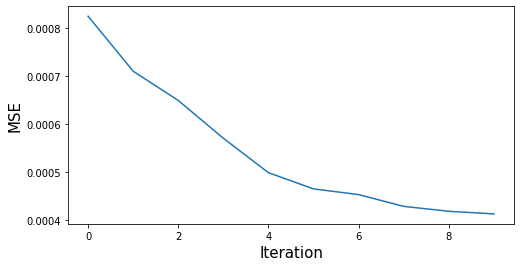

0.00041311843


In [ ]:
plot_graph(mse_values, 'MSE', 'Iteration')
print(mse_values[-1])
# зменшення похибки в 2.69 разів

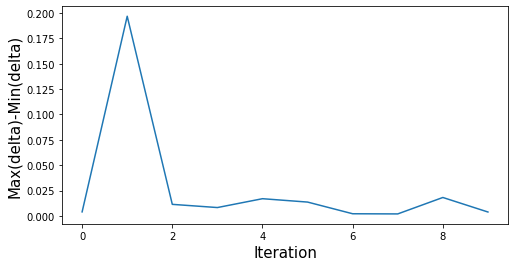

In [ ]:
plot_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

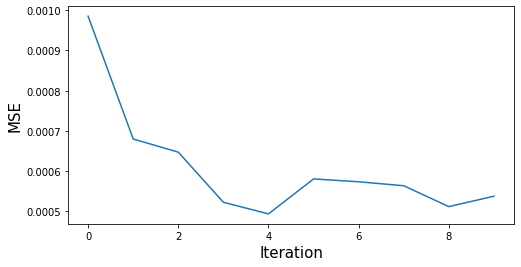

0.0005370564


In [ ]:
plot_graph(mse_values, 'MSE', 'Iteration')
print(mse_values[-1])

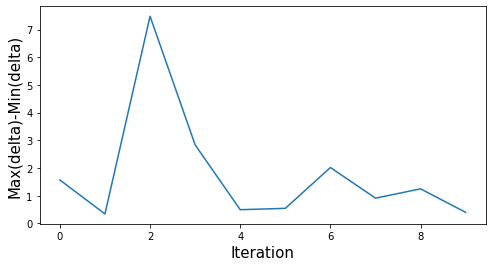

In [ ]:
plot_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

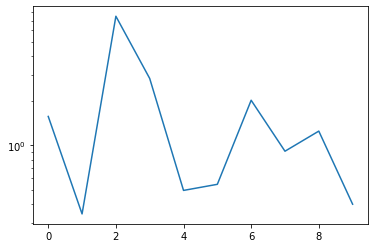

In [ ]:
plot_log_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

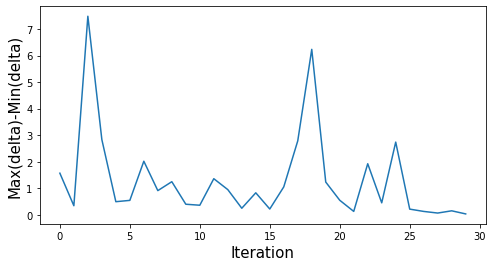

In [ ]:
plot_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

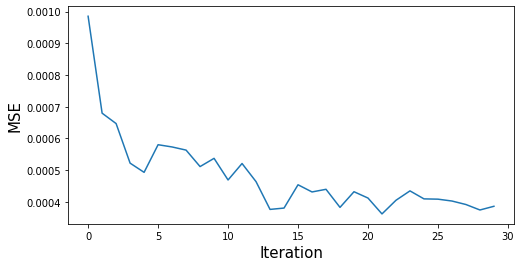

0.0003858798


In [ ]:
plot_graph(mse_values, 'MSE', 'Iteration')
print(mse_values[-1])

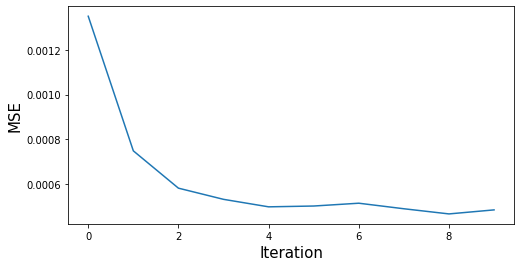

0.00048563088


In [ ]:
plot_graph(mse_values, 'MSE', 'Iteration')
print(mse_values[-1])

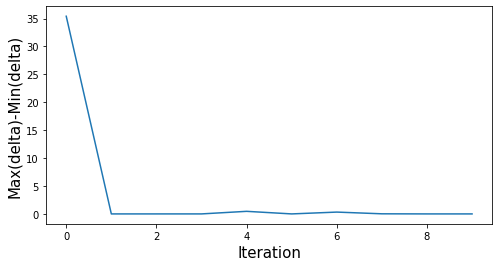

In [ ]:
plot_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

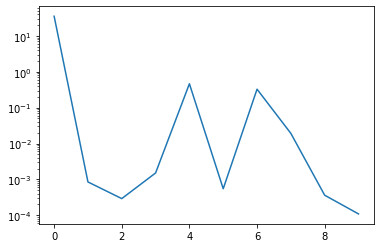

In [ ]:
plot_log_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

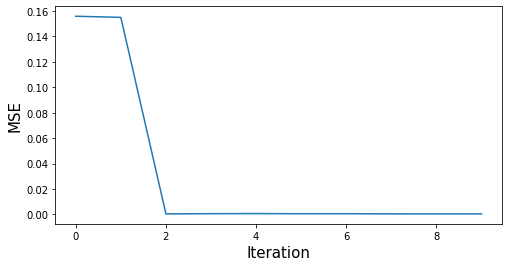

0.00045498644


In [ ]:
plot_graph(mse_values, 'MSE', 'Iteration')
print(mse_values[-1])

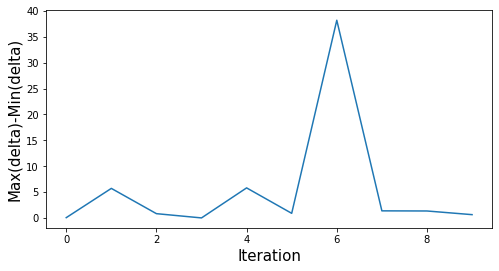

In [ ]:
plot_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

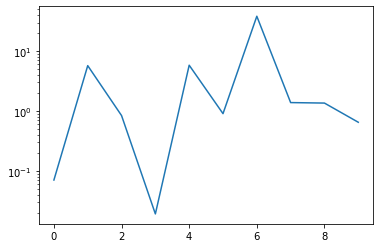

In [ ]:
plot_log_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

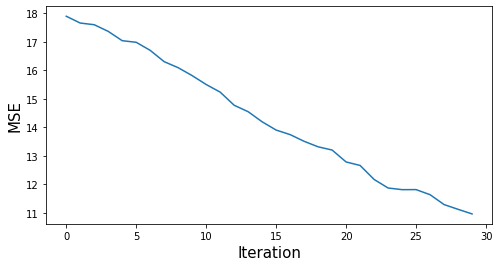

10.959134


In [ ]:
plot_graph(mse_values, 'MSE', 'Iteration')
print(mse_values[-1])

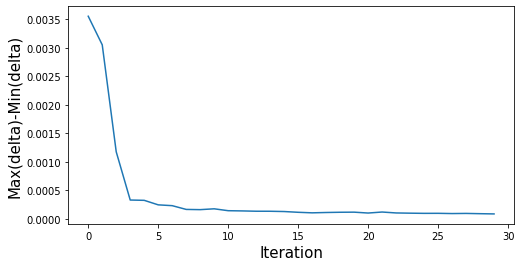

In [ ]:
plot_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

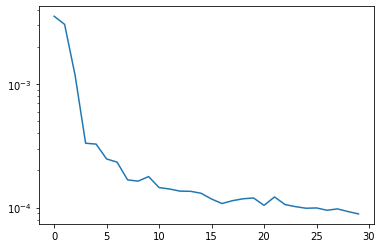

In [ ]:
plot_log_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

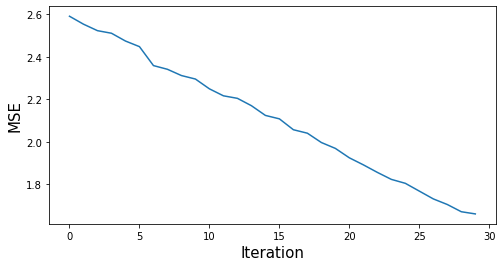

1.6595919


In [ ]:
plot_graph(mse_values, 'MSE', 'Iteration')
print(mse_values[-1])

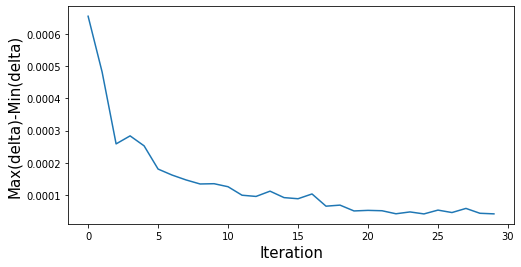

In [ ]:
plot_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

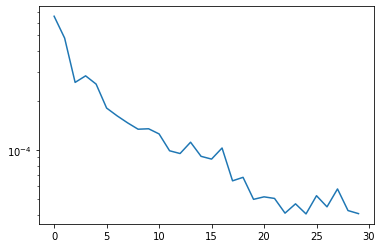

In [ ]:
plot_log_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

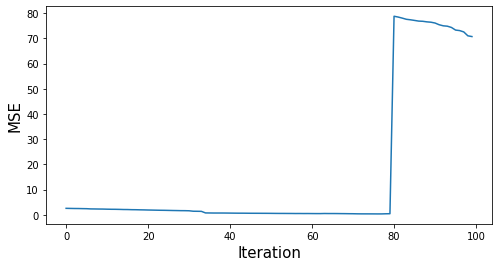

0.46012434


[2.5912523,
 2.5538175,
 2.5232673,
 2.5111327,
 2.4744203,
 2.4479647,
 2.3586895,
 2.3412225,
 2.3117309,
 2.2952514,
 2.2490425,
 2.2162395,
 2.204345,
 2.1696496,
 2.1238496,
 2.107651,
 2.0563612,
 2.0400188,
 1.9960606,
 1.968377,
 1.9239159,
 1.8908668,
 1.8553287,
 1.8223441,
 1.8037832,
 1.7670218,
 1.7302933,
 1.7039306,
 1.6698704,
 1.6595919,
 1.6212144,
 1.4404625,
 1.4183633,
 1.3909851,
 0.76806587,
 0.74898356,
 0.7284777,
 0.7286882,
 0.7273924,
 0.7190821,
 0.6988964,
 0.6801366,
 0.6650736,
 0.6637128,
 0.6501664,
 0.633246,
 0.6284069,
 0.6238006,
 0.6154435,
 0.61042583,
 0.59650266,
 0.5803601,
 0.56772137,
 0.56712747,
 0.55611753,
 0.5505684,
 0.5329962,
 0.53843164,
 0.5232941,
 0.5298383,
 0.5164625,
 0.50526595,
 0.5028703,
 0.5400731,
 0.5233084,
 0.5255392,
 0.5178204,
 0.49689475,
 0.48527944,
 0.4607594,
 0.44801027,
 0.41335666,
 0.39851257,
 0.39501178,
 0.3920176,
 0.38526896,
 0.37540615,
 0.38129678,
 0.42932007,
 0.46012434,
 78.769684,
 78.449265,


In [ ]:
plot_graph(mse_values, 'MSE', 'Iteration')
print(mse_values[79])
list1 = []
for i in mse_values:
  list1.append(i)
plot_graph(mse_values, 'MSE', 'Iteration')

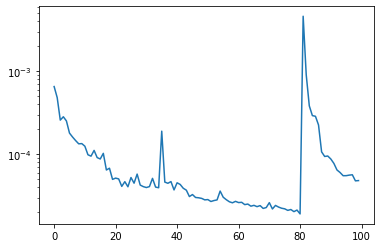

In [ ]:
plot_log_graph(deviation, 'Max(delta)-Min(delta)', 'Iteration')

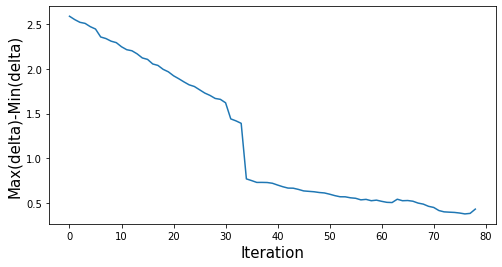

0.37540615


In [ ]:
plot_graph(mse_values[:79], 'Max(delta)-Min(delta)', 'Iteration')
print(mse_values[76])

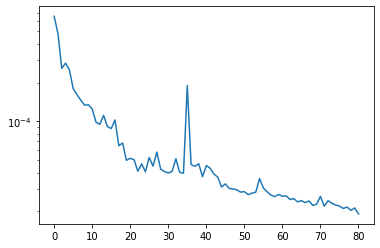

In [ ]:
plot_log_graph(deviation[0:81], 'Max(delta)-Min(delta)', 'Iteration')

In [ ]:
title_delta = 'max('+chr(948)+') - min(' + chr(948)+')'
title_mse = 'MSE'

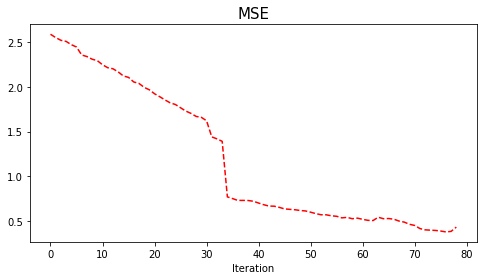

0.37540615


In [ ]:
plot_graph(mse_values[:79], 'Iteration', title_mse, 'r')
print(mse_values[76])

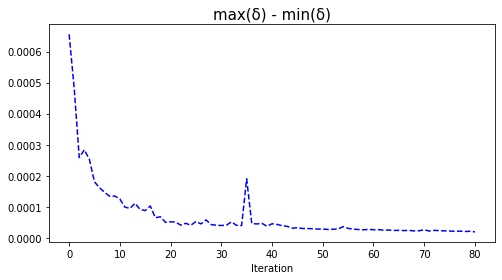

In [ ]:
plot_graph(deviation[0:81], 'Iteration', title_delta, 'b')

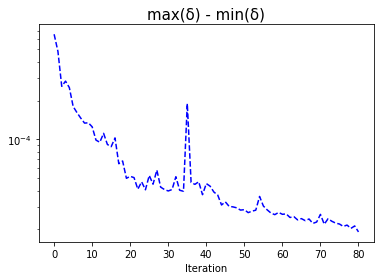

In [ ]:
plot_log_graph(deviation[0:81], 'Iteration', title_delta, 'b')

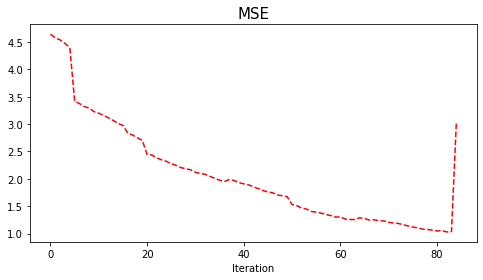

1.0345308


In [ ]:
plot_graph(mse_values[:85], 'Iteration', title_mse, 'r')
print(mse_values[83])

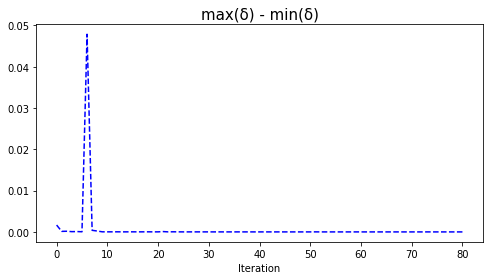

In [ ]:
plot_graph(deviation[0:81], 'Iteration', title_delta, 'b')

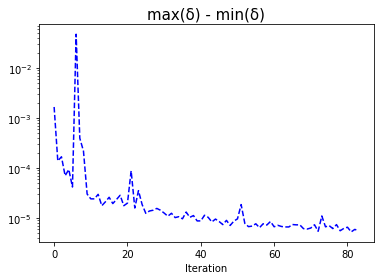

In [ ]:
plot_log_graph(deviation[0:84], 'Iteration', title_delta, 'b')

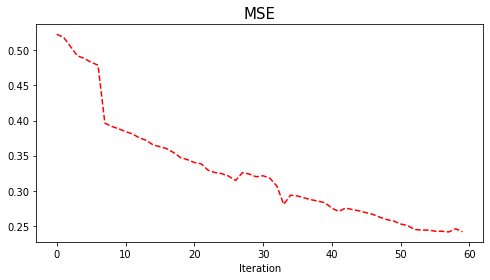

0.24159938


In [ ]:
plot_graph(mse_values[:60], 'Iteration', title_mse, 'r')
print(mse_values[59])

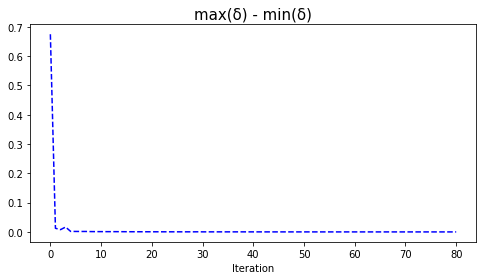

In [ ]:
plot_graph(deviation[0:81], 'Iteration', title_delta, 'b')

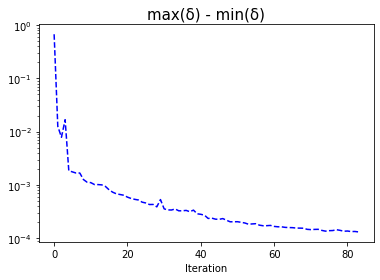

In [ ]:
plot_log_graph(deviation[0:84], 'Iteration', title_delta, 'b')

**Ukrainian hryvnia exchange rate**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/gdrive/My Drive/exchange_rate_data/final_data.xlsx", parse_dates=True, index_col='date')
data=data[:-1]
data_raw=data.copy()

data.head()

,ppi,inflation,avg_sal_uah,ipi,fx_reserves,agro_ppi,gdp_pers_uah,gdp_pers_usd,unemployment,bop,rsi,fdi,gov_budg,int_trade,state_debt_uah,state_debt_usd
date,,,,,,,,,,,,,,,,
2010-01-01,101.9,101.8,1916.0,89.2,25285.57,101.5,19832.0,2545.0,9.6,-1153.0,86.7,1282.0,-1622.6,-1309.0,301538.75,37686.69
2010-02-01,101.9,101.9,1955.0,100.4,24148.28,NaN,NaN,NaN,NaN,NaN,86.8,NaN,-4778.3,NaN,303173.71,37944.14
2010-03-01,103.0,100.9,2109.0,114.8,25147.48,NaN,NaN,NaN,NaN,-672.0,92.7,923.0,-5469.7,NaN,327219.32,41289.50
2010-04-01,103.0,99.7,2107.0,97.5,26352.11,98.5,NaN,NaN,NaN,NaN,92.9,NaN,-3764.6,NaN,NaN,NaN
2010-05-01,104.4,99.4,2201.0,97.2,26705.85,NaN,NaN,NaN,NaN,NaN,97.6,NaN,-15195.8,NaN,NaN,NaN


In [ ]:
data = data.interpolate(method='polynomial', order=1)

data.head()

,ppi,inflation,avg_sal_uah,ipi,fx_reserves,agro_ppi,gdp_pers_uah,gdp_pers_usd,unemployment,bop,rsi,fdi,gov_budg,int_trade,state_debt_uah,state_debt_usd
date,,,,,,,,,,,,,,,,
2010-01-01,101.9,101.8,1916.0,89.2,25285.57,101.500000,19832.000000,2545.000000,9.600000,-1153.000000,86.7,1282.000000,-1622.6,-1309.000000,301538.75000,37686.690000
2010-02-01,101.9,101.9,1955.0,100.4,24148.28,100.466667,20181.724551,2584.817365,9.525749,-900.271186,86.8,1093.372881,-4778.3,-1465.763473,303173.71000,37944.140000
2010-03-01,103.0,100.9,2109.0,114.8,25147.48,99.533333,20497.604790,2620.781437,9.458683,-672.000000,92.7,923.000000,-5469.7,-1607.356287,327219.32000,41289.500000
2010-04-01,103.0,99.7,2107.0,97.5,26352.11,98.500000,20847.329341,2660.598802,9.384431,1272.913043,92.9,1014.989130,-3764.6,-1764.119760,340205.91413,42940.677935
2010-05-01,104.4,99.4,2201.0,97.2,26705.85,98.303279,21185.772455,2699.131737,9.312575,3155.086957,97.6,1104.010870,-15195.8,-1915.826347,352773.58587,44538.592065


In [ ]:
data_usd = pd.read_csv('/content/gdrive/My Drive/exchange_rate_data/exchange_rate.csv')
data_usd_raw = data_usd.copy()

data_usd.head()

,date,amount,total_ex,exrate
0,01.01.2010,100,798.5,7.985
1,02.01.2010,100,798.5,7.985
2,03.01.2010,100,798.5,7.985
3,04.01.2010,100,798.5,7.985
4,05.01.2010,100,798.5,7.985


In [ ]:
data_usd['date'] = pd.to_datetime(data_usd['date'],
                    format='%d.%m.%Y', errors='ignore')
data_usd = data_usd.set_index('date')
data_usd = data_usd['exrate']

data_usd.head()

date
2010-01-01    7.985
2010-01-02    7.985
2010-01-03    7.985
2010-01-04    7.985
2010-01-05    7.985
Name: exrate, dtype: float64

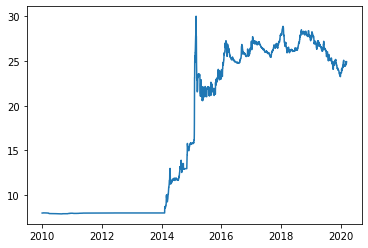

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(data_usd)
plt.show()

In [ ]:
data_usd = data_usd.resample('M').mean()

end_date = '2019-12-31'
data_usd = data_usd[:end_date]

data = data.assign(exrate = data_usd.values)

start_date = '2012-01-01'
data = data[start_date:]

data.head()

,ppi,inflation,avg_sal_uah,ipi,fx_reserves,agro_ppi,gdp_pers_uah,gdp_pers_usd,unemployment,bop,rsi,fdi,gov_budg,int_trade,state_debt_uah,state_debt_usd,exrate
date,,,,,,,,,,,,,,,,,
2012-01-01,99.2,100.2,2722.0,86.2,31364.11,107.658197,28990.784153,3594.224044,8.557650,-1863.285714,89.5,1755.516484,1460.4,-6941.030055,474837.678026,59426.328684,7.989794
2012-02-01,100.8,100.2,2799.0,101.7,31048.64,103.516393,29168.568306,3618.448087,8.515301,-1194.571429,102.5,1888.032967,4697.5,-7134.060109,476553.736053,59636.957368,7.988448
2012-03-01,101.1,100.3,2923.0,110.1,31127.97,99.641803,29334.882514,3641.109290,8.475683,-569.000000,104.1,2012.000000,978.5,-7314.636612,478159.080658,59833.997105,7.986242
2012-04-01,103.7,100.0,2942.0,95.6,31660.56,95.500000,29512.666667,3665.333333,8.433333,-562.597826,100.5,1761.978261,-4519.6,-7507.666667,479875.138684,60044.625789,7.986720
2012-05-01,100.2,99.7,3015.0,102.0,30758.86,94.983607,29684.715847,3688.775956,8.392350,-556.402174,102.8,1520.021739,-3657.8,-7694.469945,481535.840000,60248.460000,7.990777


In [ ]:
data_interbank = pd.read_excel('/content/gdrive/My Drive/exchange_rate_data/interbank.xlsx')

data_interbank.head()

,date,total_amount_usd,part_of_usd
0,04.01.2012 Ср,"738,29","614,69"
1,05.01.2012 Чт,"750,70","645,63"
2,06.01.2012 Пт,"477,66","421,40"
3,10.01.2012 Вт,"722,50","637,21"
4,11.01.2012 Ср,"702,51","519,05"


In [ ]:
import re
 
def regexp(reg):

    res = re.findall(r'\d{2}.\d{2}.\d{4}', reg)
    return res[0]     

data_interbank['date'] = data_interbank['date'].apply(regexp)

data_interbank['date'].head()

0    04.01.2012
1    05.01.2012
2    06.01.2012
3    10.01.2012
4    11.01.2012
Name: date, dtype: object

In [ ]:
def replace(rep):

    rep = rep.replace(',', '.') 
    return rep

def to_float(fl):

    fl = float(fl)
    return fl

data_interbank['total_amount_usd'] = data_interbank['total_amount_usd'].apply(replace)
data_interbank['total_amount_usd'] = data_interbank['total_amount_usd'].apply(to_float)

data_interbank['total_amount_usd'].head()

0    738.29
1    750.70
2    477.66
3    722.50
4    702.51
Name: total_amount_usd, dtype: float64

In [ ]:
data_interbank['date'] = pd.to_datetime(data_interbank['date'],
                    format='%d.%m.%Y', errors='ignore')
data_interbank = data_interbank.set_index('date')
data_interbank = data_interbank['total_amount_usd']
data_interbank = data_interbank.resample('M').sum()
data_interbank = data_interbank[start_date:]

data_interbank.head()

data = data.assign(interbank = data_interbank.values)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range = (0, 1))

X = data.drop(labels=['exrate'], axis=1)
X = pd.DataFrame(scaler_X.fit_transform(X), columns = X.columns)

X.head()

,ppi,inflation,avg_sal_uah,ipi,fx_reserves,agro_ppi,gdp_pers_uah,gdp_pers_usd,unemployment,bop,rsi,fdi,gov_budg,int_trade,state_debt_uah,state_debt_usd,interbank
0,0.198582,0.098039,0.000000,0.156863,0.988614,0.627429,0.000000,0.737768,0.330224,0.557419,0.240209,0.895824,0.682381,0.152841,0.000000,0.000000,0.245944
1,0.312057,0.098039,0.008070,0.663399,0.976496,0.485099,0.002640,0.749849,0.315621,0.614794,0.579634,0.944868,0.710162,0.138697,0.001013,0.008446,0.269102
2,0.333333,0.104575,0.021065,0.937908,0.979544,0.351952,0.005109,0.761152,0.301960,0.668468,0.621410,0.990748,0.678246,0.125466,0.001961,0.016347,0.346751
3,0.517730,0.084967,0.023056,0.464052,1.000000,0.209622,0.007748,0.773234,0.287356,0.669018,0.527415,0.898215,0.631061,0.111323,0.002974,0.024793,0.309585
4,0.269504,0.065359,0.030706,0.673203,0.965366,0.191877,0.010303,0.784926,0.273224,0.669549,0.587467,0.808668,0.638457,0.097636,0.003955,0.032967,0.350432


In [ ]:
scaler_y = MinMaxScaler(feature_range = (0, 1))

y = np.array(data['exrate'])
y = np.reshape(y, (len(y),-1))
y = pd.DataFrame(scaler_y.fit_transform(y))

y.head()

,0
0,0.000174
1,0.000108
2,0.000000
3,0.000023
4,0.000222


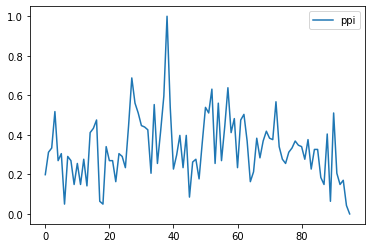

In [ ]:
def raw_plot(data, column_name):

    plt.plot(data.index, data[column_name], label=column_name)
    plt.legend()
    plt.show()    
    
raw_plot(X, 'ppi')

In [ ]:
features = list(X.columns)
print(features)

['ppi', 'inflation', 'avg_sal_uah', 'ipi', 'fx_reserves', 'agro_ppi', 'gdp_pers_uah', 'gdp_pers_usd', 'unemployment', 'bop', 'rsi', 'fdi', 'gov_budg', 'int_trade', 'state_debt_uah', 'state_debt_usd', 'interbank']


In [ ]:
def fix_outliers(column):
    
    learning_rate = 0.35
    
    q1 = X[column].quantile(0.25)
    q3 = X[column].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    
    X[column].loc[(X[column] >= fence_high)] = X[column].quantile(1-learning_rate)
    X[column].loc[(X[column] <= fence_low)] = X[column].quantile(learning_rate)
        
for col in features:
    fix_outliers(col) 

In [ ]:
def fix_outliers(column):
    
    learning_rate = 0.35
    
    q1 = X[column].quantile(0.25)
    q3 = X[column].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    
    X[column].loc[(X[column] >= fence_high)] = X[column].quantile(1-learning_rate)
    X[column].loc[(X[column] <= fence_low)] = X[column].quantile(learning_rate)
        
for col in features:
    fix_outliers(col)  

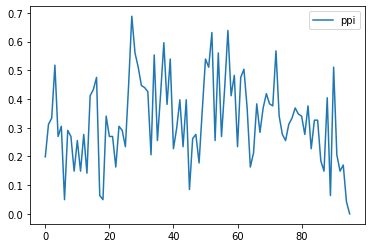

In [ ]:
raw_plot(X, 'ppi')

In [ ]:
def feature_lag(features):

    for feature in features:
        X[feature + '-lag1'] = X[feature].shift(1)
        X[feature + '-lag2'] = X[feature].shift(2)
        X[feature + '-lag3'] = X[feature].shift(3)
        X[feature + '-lag6'] = X[feature].shift(6)
        X[feature + '-lag12'] = X[feature].shift(12)
    
feature_lag(features)  
X.drop(features, axis=1, inplace=True)

print(X.columns)

Index(['ppi-lag1', 'ppi-lag2', 'ppi-lag3', 'ppi-lag6', 'ppi-lag12',
       'inflation-lag1', 'inflation-lag2', 'inflation-lag3', 'inflation-lag6',
       'inflation-lag12', 'avg_sal_uah-lag1', 'avg_sal_uah-lag2',
       'avg_sal_uah-lag3', 'avg_sal_uah-lag6', 'avg_sal_uah-lag12', 'ipi-lag1',
       'ipi-lag2', 'ipi-lag3', 'ipi-lag6', 'ipi-lag12', 'fx_reserves-lag1',
       'fx_reserves-lag2', 'fx_reserves-lag3', 'fx_reserves-lag6',
       'fx_reserves-lag12', 'agro_ppi-lag1', 'agro_ppi-lag2', 'agro_ppi-lag3',
       'agro_ppi-lag6', 'agro_ppi-lag12', 'gdp_pers_uah-lag1',
       'gdp_pers_uah-lag2', 'gdp_pers_uah-lag3', 'gdp_pers_uah-lag6',
       'gdp_pers_uah-lag12', 'gdp_pers_usd-lag1', 'gdp_pers_usd-lag2',
       'gdp_pers_usd-lag3', 'gdp_pers_usd-lag6', 'gdp_pers_usd-lag12',
       'unemployment-lag1', 'unemployment-lag2', 'unemployment-lag3',
       'unemployment-lag6', 'unemployment-lag12', 'bop-lag1', 'bop-lag2',
       'bop-lag3', 'bop-lag6', 'bop-lag12', 'rsi-lag1', 'rsi-lag2'

In [ ]:
X.head()

real_X_size = len(X)
X = X.dropna()
dropna_X_size = len(X)
y = y[real_X_size-dropna_X_size:]

In [ ]:
train_size = 0.78
separator = round(len(X.index)*train_size)

X_train, y_train = X.iloc[0:separator], y.iloc[0:separator]
y_test, y_test = X.iloc[separator:], y.iloc[separator:]

TypeError: ignored

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential  ([
  Dense(128, activation='relu', input_shape=[len(X.columns)]),
  Dropout(0.3),
  Dense(1, activation='sigmoid')
  optimizer=Adam(lr=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['accuracy'])

SyntaxError: ignored

In [ ]:
from keras.constraints import maxnorm

model1=Sequential()
dense1_1=Dense(6, activation='relu', input_shape=[len(X.columns)],)
model1.add(dense1_1)
dense1_2=Dense(3, activation='relu')
model1.add(dense1_2)
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])

In [ ]:
from keras.constraints import maxnorm

model2=Sequential()
dense1_1=Dense(6, activation='relu', input_shape=[len(X.columns)],)
model2.add(dense1_1)
dense1_2=Dense(3)
model2.add(dense1_2)
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])

In [ ]:
# create weights with the right shape, e.g.
random_weights = [np.random.rand(*w.shape) for w in model1.get_weights()]

# update
model1.set_weights(random_weights)
model2.set_weights(random_weights)

In [ ]:
weights1 = []
initial_biases1 = []
for i in range(len(model1.layers)):
    weights1.append(model1.layers[i].get_weights()[0])
    initial_biases1.append(model1.layers[i].get_weights()[1])
print(initial_biases1)

[array([6.0965365e-01, 1.0394490e-01, 7.6952219e-02, 9.9799812e-01,
       7.4015908e-02, 9.0807110e-02, 4.3399921e-01, 3.6010107e-01,
       3.7132941e-02, 8.8849777e-01, 7.5979108e-01, 2.9983386e-01,
       7.1077353e-01, 9.8124760e-01, 1.6136770e-01, 5.8259070e-01,
       4.2979202e-01, 6.5686637e-01, 1.8258224e-01, 1.3565141e-02,
       1.5226170e-01, 1.9069375e-01, 5.7493758e-01, 6.9755864e-01,
       7.5077897e-01, 1.7947547e-01, 1.7072219e-01, 2.5540486e-01,
       7.4781859e-01, 5.7130641e-01, 6.6678089e-01, 6.5313321e-01,
       2.0841879e-01, 7.2327459e-01, 7.3658830e-01, 9.3234605e-01,
       2.6249827e-03, 3.6820775e-01, 3.7341249e-01, 1.7968925e-02,
       6.6452193e-01, 8.8455290e-01, 5.4469711e-01, 3.4365001e-01,
       7.9850781e-01, 6.2301439e-01, 5.8901376e-01, 9.7824299e-01,
       6.6565633e-01, 7.6299119e-01, 3.1923056e-02, 9.7376895e-01,
       8.1795788e-01, 4.4467172e-01, 8.5913050e-01, 6.2001330e-01,
       7.6073438e-01, 8.2217883e-03, 5.6886017e-01, 3.3346078

In [ ]:
weights2 = []
initial_biases2 = []
for i in range(len(model2.layers)):
    weights2.append(model2.layers[i].get_weights()[0])
    initial_biases2.append(model2.layers[i].get_weights()[1])
#print(weights2)
print(initial_biases2)

[array([6.0965365e-01, 1.0394490e-01, 7.6952219e-02, 9.9799812e-01,
       7.4015908e-02, 9.0807110e-02, 4.3399921e-01, 3.6010107e-01,
       3.7132941e-02, 8.8849777e-01, 7.5979108e-01, 2.9983386e-01,
       7.1077353e-01, 9.8124760e-01, 1.6136770e-01, 5.8259070e-01,
       4.2979202e-01, 6.5686637e-01, 1.8258224e-01, 1.3565141e-02,
       1.5226170e-01, 1.9069375e-01, 5.7493758e-01, 6.9755864e-01,
       7.5077897e-01, 1.7947547e-01, 1.7072219e-01, 2.5540486e-01,
       7.4781859e-01, 5.7130641e-01, 6.6678089e-01, 6.5313321e-01,
       2.0841879e-01, 7.2327459e-01, 7.3658830e-01, 9.3234605e-01,
       2.6249827e-03, 3.6820775e-01, 3.7341249e-01, 1.7968925e-02,
       6.6452193e-01, 8.8455290e-01, 5.4469711e-01, 3.4365001e-01,
       7.9850781e-01, 6.2301439e-01, 5.8901376e-01, 9.7824299e-01,
       6.6565633e-01, 7.6299119e-01, 3.1923056e-02, 9.7376895e-01,
       8.1795788e-01, 4.4467172e-01, 8.5913050e-01, 6.2001330e-01,
       7.6073438e-01, 8.2217883e-03, 5.6886017e-01, 3.3346078

In [ ]:
history = model1.fit(X_train, y_train)

3/3 [==============================] - 0s 4ms/step - loss: 0.3156 - mse: 0.3156 - mae: 0.4210


In [ ]:
y_pred_test1=model1.predict(X_test)
print(mean_squared_error(y_test, y_pred_test1))
print(y_test)

0.010986642022332103
           0
78  0.917251
79  0.969797
80  1.004473
81  1.001349
82  0.991867
83  0.984807
84  0.989211
85  0.954073
86  0.939541
87  0.936996
88  0.915838
89  0.921768
90  0.885151
91  0.860485
92  0.837145
93  0.839027
94  0.817475
95  0.780402


In [ ]:
y_train = y_train  + 0.01
y_test = y_test + 0.01
print(y_test)

           0
78  0.927251
79  0.979797
80  1.014473
81  1.011349
82  1.001867
83  0.994807
84  0.999211
85  0.964073
86  0.949541
87  0.946996
88  0.925838
89  0.931768
90  0.895151
91  0.870485
92  0.847145
93  0.849027
94  0.827475
95  0.790402


In [ ]:
history = model2.fit(X_train, y_train)

3/3 [==============================] - 0s 4ms/step - loss: 0.3073 - mse: 0.3073 - mae: 0.4113


In [ ]:
first_model_weights = []
second_model_weights = []
for i in range(len(model1.layers)):
  first_model_weights.append(model1.layers[i].get_weights()[0])
print("First model weights after training")
print(first_model_weights)
for i in range(len(model2.layers)):
  second_model_weights.append(model2.layers[i].get_weights()[0])
print("Second model weights after training")
print(second_model_weights)
deviation = get_delta(model1, model2)
print("Deviation")
print(deviation)
max_elements = []
min_elements = []
for i in range(len(model1.layers)):
  max_elements.append(np.max(np.asarray(deviation[i])))
  min_elements.append(np.min(np.asarray(deviation[i])))
max_element = np.max(np.asarray(max_elements))
min_element = np.min(np.asarray(min_elements))
print("Max_element")
print(max_element)
print("Min_element")
print(min_element)
print("Max_delta-Min_delta")
print(max_element - min_element)

First model weights after training
[array([[0.7624396 , 0.9816906 , 0.6878819 , ..., 0.2784413 , 0.1584475 ,
        0.25202352],
       [0.4610319 , 0.21736513, 0.15846889, ..., 0.7556312 , 0.0501719 ,
        0.6442941 ],
       [0.8914304 , 0.47636452, 0.7672799 , ..., 0.2723093 , 0.9993125 ,
        0.3870441 ],
       ...,
       [0.27072206, 0.3328898 , 0.45802987, ..., 0.38076442, 0.13664708,
        0.42234197],
       [0.22179663, 0.5414077 , 0.21274577, ..., 0.8143608 , 0.1576019 ,
        0.00339233],
       [0.75442874, 0.01684603, 0.3918309 , ..., 0.67703605, 0.68281156,
        0.88266736]], dtype=float32), array([[0.9104596 , 0.81286055, 0.30643326, ..., 0.9747042 , 0.5686588 ,
        0.7986302 ],
       [0.7019118 , 0.3683624 , 0.4890442 , ..., 0.5905216 , 0.80019456,
        0.8931424 ],
       [0.74593174, 0.9458238 , 0.6622653 , ..., 0.9034898 , 0.5381181 ,
        0.79737157],
       ...,
       [0.15695173, 0.09305193, 0.5071488 , ..., 0.26157308, 0.8739284 ,
    

In [ ]:
def get_model():
  model=Sequential()
  dense1=Dense(units=8, input_dim=10, activation='relu')
  model.add(dense1)
  dense2=Dense(4, activation='relu')
  model.add(dense2)
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
  return model

In [ ]:
def reduct(model1, model2, weights, initial_biases1, initial_biases2):
  mask_matrix = []
  calculated_MSE = []
  deviation = []
  k = 0
  print("Reduct")
  while(k != 10):
    print("WEIGHTS1")
    print(model1.get_weights())
    print("WEIGHTS2")
    print(model2.get_weights())
    delta_matrix = get_delta(model1, model2)
    print("DELTA")
    print(delta_matrix)
    converted_delta_matrix = []
    for i in range(len(delta_matrix)):
      delta_matrix[i] = np.nan_to_num(delta_matrix[i])
      converted_delta_matrix.append(np.where(delta_matrix[i] == 0, 1, delta_matrix[i]))
    max_elements = []
    min_elements = []
    # weights = []
    # for i in range(len(model1.layers)):
    #     weights.append(model1.layers[i].get_weights()[0])
    if k == 0:
      for i in range(len(delta_matrix)):
        mask_matrix.append(np.ones_like(delta_matrix[i]))
    for i in range(len(model1.layers)):
      max_elements.append(np.max(np.asarray(delta_matrix[i])))
      min_elements.append(np.min(np.asarray(converted_delta_matrix[i])))
    max_element = np.max(np.asarray(max_elements))
    print(max_element)
    print("MAX_ELEM")
    min_element = np.min(np.asarray(min_elements))
    print("MIN_ELEM")
    print(min_element)
    deviation.append(max_element - min_element)
    max_element_layer_index =  np.unravel_index(np.argmax(np.asarray(max_elements), axis=None),np.asarray(max_elements).shape)[0]
    max_element_indexes= np.unravel_index(np.argmax(delta_matrix[max_element_layer_index], axis=None), delta_matrix[max_element_layer_index].shape)
    mask_matrix[max_element_layer_index][max_element_indexes]=0
    k+=1
    model1 = get_model()
    model2 = get_model()
    for i in range(len(model1.layers)):
      model1.layers[i].set_weights([np.multiply(weights[i], mask_matrix[i]),initial_biases1[i]])
      model2.layers[i].set_weights([np.multiply(weights[i], mask_matrix[i]), initial_biases2[i]])
    model1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),shuffle=False,callbacks=[FreezeWeights(mask_matrix)])
    model2.fit(X_train,y_train_disturbed,epochs=10,validation_data=(X_test,y_test_disturbed),shuffle=False, callbacks=[FreezeWeights(mask_matrix)])
    y_pred_test=model1.predict(X_test)
    calculated_MSE.append(mean_squared_error(y_test, y_pred_test))
  return calculated_MSE, deviation

mse_values, deviation = reduct(model1, model2, weights1, initial_biases1, initial_biases2)

Reduct
WEIGHTS1
[array([[0.55919594, 0.37208158, 0.22366084, 0.7860004 , 0.06106394,
        0.69768906, 0.595871  , 0.21014203],
       [0.2861233 , 0.6037435 , 0.3009241 , 0.24820416, 0.6632365 ,
        0.9186277 , 0.5347383 , 0.74454314],
       [0.42016968, 0.97076887, 0.01598621, 0.49941373, 0.2998382 ,
        0.1006546 , 0.4849401 , 0.62872505],
       [0.3630583 , 0.40402624, 0.9872683 , 0.74973583, 0.65966845,
        0.88853   , 0.6015656 , 0.3633186 ],
       [0.32481676, 0.89399725, 0.7956241 , 0.765853  , 0.8837926 ,
        0.14526317, 0.6313089 , 0.34066197],
       [0.71714336, 0.7735636 , 0.922113  , 0.45717812, 0.65423864,
        0.7218509 , 0.41469198, 0.6407102 ],
       [0.7183998 , 0.56807804, 0.92307055, 0.5188365 , 0.8649139 ,
        0.4340271 , 0.42856622, 0.756634  ],
       [0.30743438, 0.23001513, 0.59889853, 0.11371368, 0.37517533,
        0.98489845, 0.06558567, 0.82231086],
       [0.17937659, 0.98422676, 0.6158024 , 0.4732205 , 0.69401705,
        0.6

ValueError: ignored

### Scaling

In [ ]:
greek_letterz=[chr(code) for code in range(945,970)]

print(greek_letterz)

['α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ', 'λ', 'μ', 'ν', 'ξ', 'ο', 'π', 'ρ', 'ς', 'σ', 'τ', 'υ', 'φ', 'χ', 'ψ', 'ω']
